In [ ]:
# Notebook for creating & running random forest models on the simulated data 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import seaborn as sn
import numpy as np
import pandas as pd

In [597]:
#np.random.seed(31415)

In [598]:
# GROUP: OCELOT
# CSM 185

In [599]:
sim_staticV1 = pd.read_csv("../Data/Static_Data_ICU_var1_peak.csv")
sim_staticV2 = pd.read_csv("../Data/Static_Data_ICU_var2_peak.csv")
sim_staticV3 = pd.read_csv("../Data/Static_Data_ICU_var3.csv")

# var2 dataset has higher variance in simulated values, so we would expect worse model performance
# var3 dataset should have even higher variance

sim_staticV1.head()

,Unnamed: 0,ICU,Age,Sex,Survival Probability,Score,Kidney,Blood,Cholesterol,Immune,...,O2,HR,BP,RBC,LDL,HDL,Platelet,WBC,INR,Death
0,1,1,49,F,0.819668,0.932323,0.851415,0.789044,0.743088,0.848733,...,96.552552,70.815957,68.640993,4.445352,141.438747,80.428266,377446.453569,8689.129619,5.282563,0
1,2,1,85,M,0.493352,0.545629,0.400727,0.498132,0.448064,0.464661,...,95.167034,99.189290,63.011305,4.124222,157.806799,33.992189,0.000000,3484.471712,6.783162,1
2,3,1,65,M,0.658073,0.648700,0.612584,0.635265,0.596647,0.690954,...,96.031453,63.289582,66.286136,4.599221,163.033611,88.730209,384086.644694,5034.262028,7.582851,0
3,4,1,40,F,0.907399,0.859131,0.924469,0.954992,0.946001,1.000000,...,97.090119,71.956946,92.109964,5.577905,117.153138,68.678224,299955.144276,7851.228124,1.729525,0
4,5,1,40,F,0.850763,0.930617,0.895776,0.890731,0.876580,0.767765,...,97.769863,90.973826,67.955142,4.623505,126.284526,80.002718,358008.401336,4736.958890,6.370734,0


In [600]:
# Clean data in preparation:
sim_staticV1 = sim_staticV1.drop(columns=["Unnamed: 0", "CHM"])
sim_staticV1 = sim_staticV1.replace(["M", "F"], [0,1])

sim_staticV2 = sim_staticV2.drop(columns=["Unnamed: 0", "CHM"])
sim_staticV2 = sim_staticV2.replace(["M", "F"], [0,1])

sim_staticV3 = sim_staticV3.drop(columns=["Unnamed: 0", "CHM"])
sim_staticV3 = sim_staticV3.replace(["M", "F"], [0,1])

sim_staticV3.tail()

,ICU,Age,Sex,Survival_Probability,Score,Kidney,Blood,Cholesterol,Immune,ApacheII,...,O2,HR,BP,RBC,LDL,HDL,Platelet,WBC,INR,Death
995,1,48,0,0.784171,0.784171,0.784171,0.784171,0.784171,0.784171,19.969460,...,96.671757,93.312974,68.358783,4.517634,139.938921,83.297704,384132.790327,5170.229613,5.692976,0
996,1,37,0,0.856422,0.856422,0.856422,0.856422,0.856422,0.856422,17.078377,...,97.153604,91.385585,70.768019,5.690815,134.156754,45.768019,365148.008652,5507.522689,5.028027,0
997,1,69,0,0.695986,0.695986,0.695986,0.695986,0.695986,0.695986,23.101824,...,96.149696,95.401216,96.550912,5.881558,146.203648,40.748480,404701.978904,9810.182420,6.413420,0
998,1,84,1,0.565340,0.565340,0.565340,0.565340,0.565340,0.565340,27.612627,...,95.397896,61.591582,61.989478,6.024400,155.225254,92.214731,434322.916193,10261.262683,7.450904,1
999,1,74,0,0.663907,0.663907,0.663907,0.663907,0.663907,0.663907,24.202210,...,95.966298,63.865193,97.101105,4.383597,148.404420,88.235911,65029.504086,4676.408860,6.666508,0


In [601]:
sim_staticV1.isna().sum() # no null values (because data is simulated)

ICU                     0
Age                     0
Sex                     0
Survival Probability    0
Score                   0
Kidney                  0
Blood                   0
Cholesterol             0
Immune                  0
ApacheII                0
Urine Volume            0
Creatinine              0
Urea                    0
O2                      0
HR                      0
BP                      0
RBC                     0
LDL                     0
HDL                     0
Platelet                0
WBC                     0
INR                     0
Death                   0
dtype: int64

In [669]:
# Goal: predict death tag based on data
x_train1, x_test1, y_train1, y_test1 = train_test_split(sim_staticV1.drop(["ICU","Death","Survival Probability"], axis = "columns"), sim_staticV1["Death"], test_size = 0.34)

x_train2, x_test2, y_train2, y_test2 = train_test_split(sim_staticV2.drop(["ICU","Death","Survival Probability"], axis = "columns"), sim_staticV2["Death"], test_size = 0.34)

x_train3, x_test3, y_train3, y_test3 = train_test_split(sim_staticV3.drop(["ICU","Death","Survival_Probability"], axis = "columns"), sim_staticV3["Death"], test_size = 0.34)

x_trainR1, x_testR1, y_trainR1, y_testR1 = train_test_split(sim_staticV1.drop(["ICU","Death","Survival Probability"], axis = "columns"), sim_staticV1["Survival Probability"], test_size = 0.34)

x_trainR2, x_testR2, y_trainR2, y_testR2 = train_test_split(sim_staticV2.drop(["ICU","Death","Survival Probability"], axis = "columns"), sim_staticV2["Survival Probability"], test_size = 0.34)

x_trainR3, x_testR3, y_trainR3, y_testR3 = train_test_split(sim_staticV3.drop(["ICU","Death","Survival_Probability"], axis = "columns"), sim_staticV3["Survival_Probability"], test_size = 0.34)


# creating train/test cohorts for model creation

In [670]:
len(x_train1) # 750 elements
model_staticV1 = RandomForestClassifier(n_estimators = 100)
model_staticV1.fit(x_train1, y_train1)

model_staticV2 = RandomForestClassifier(n_estimators = 100)
model_staticV2.fit(x_train2, y_train2)

model_staticV3 = RandomForestClassifier(n_estimators=100)
model_staticV3.fit(x_train3, y_train3)

model_staticRegV1 = RandomForestRegressor(n_estimators=100)
model_staticRegV1.fit(x_trainR1, y_trainR1)

model_staticRegV2 = RandomForestRegressor(n_estimators=100)
model_staticRegV2.fit(x_trainR2, y_trainR2)
    
model_staticRegV3 = RandomForestRegressor(n_estimators=100)
model_staticRegV3.fit(x_trainR3, y_trainR3)
    
    
# each random forest classifier will consist of 100 individual decision trees

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [627]:
model_staticV1.score(x_test1, y_test1) # model 1 score

0.6441176470588236

In [628]:
model_staticV2.score(x_test2, y_test2) # model 2 score

0.6676470588235294

In [629]:
model_staticV3.score(x_test3, y_test3)

0.6411764705882353

In [630]:
y_predicted1 = model_staticV1.predict(x_test1)

In [631]:
y_predicted2 = model_staticV2.predict(x_test2)

In [632]:
y_predicted3 = model_staticV3.predict(x_test3)

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# for visualizations

In [634]:
cm_staticV1 = confusion_matrix(y_test1, y_predicted1)
cm_staticV2 = confusion_matrix(y_test2, y_predicted2)
cm_staticV3 = confusion_matrix(y_test3, y_predicted3)

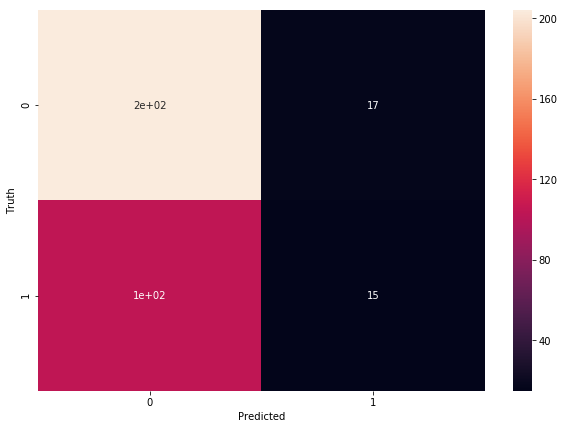

In [687]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm_staticV1, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig("V1-Classification-Confusion.png")

# confusion matrix for v1

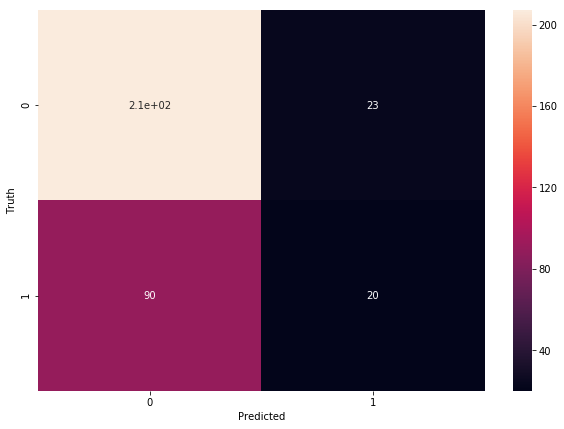

In [688]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_staticV2, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig("V2-Classification-Confusion.png")

# confusion matrix for v2

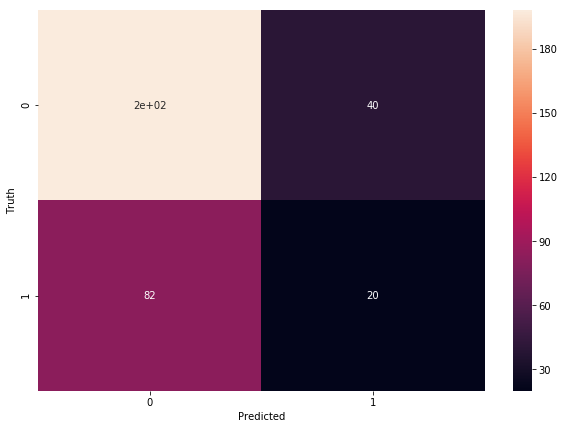

In [689]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_staticV3, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig("V3-Classification-Confusion.png")

# confusion matrix for v3

In [638]:
roc_auc_score(np.array(y_test1), np.array(y_predicted1)) 

0.5245636716224952

In [639]:
roc_auc_score(np.array(y_test2), np.array(y_predicted2)) 

0.5409090909090909

In [640]:
roc_auc_score(np.array(y_test3), np.array(y_predicted3)) 

0.5140056022408963

In [641]:
roc_curve(y_test1, y_predicted1)

(array([0.        , 0.07692308, 1.        ]),
 array([0.        , 0.12605042, 1.        ]),
 array([2, 1, 0]))

In [642]:
roc_curve(y_test2, y_predicted2)

(array([0. , 0.1, 1. ]),
 array([0.        , 0.18181818, 1.        ]),
 array([2, 1, 0]))

In [643]:
roc_curve(y_test3, y_predicted3)

(array([0.        , 0.16806723, 1.        ]),
 array([0.        , 0.19607843, 1.        ]),
 array([2, 1, 0]))

In [644]:
fpr1, tpr1, threshold1 = roc_curve(y_test1, y_predicted1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, threshold2 = roc_curve(y_test2, y_predicted2)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, threshold3 = roc_curve(y_test3, y_predicted3)
roc_auc3 = auc(fpr3, tpr3)

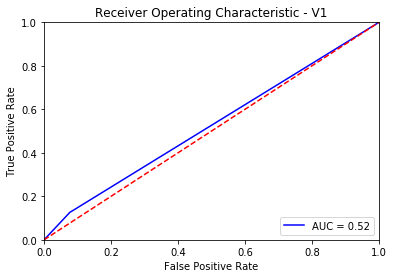

In [704]:
plt.title('Receiver Operating Characteristic - V1')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("V1-Classification-ROC.png")
plt.show()


# ROC Curve for v1

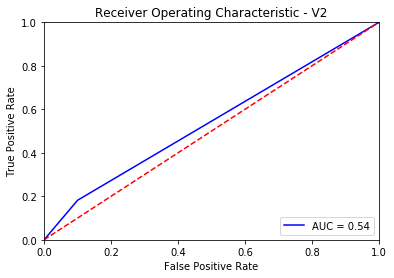

In [703]:
plt.title('Receiver Operating Characteristic - V2')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("V2-Classification-ROC.png")
plt.show()


# ROC Curve for v2

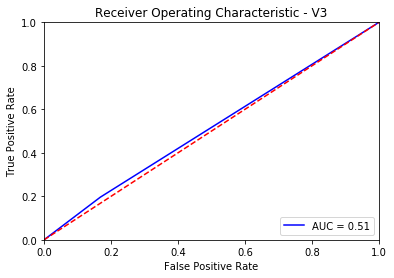

In [702]:
plt.title('Receiver Operating Characteristic - V3')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("V3-Classification-ROC.png")
plt.show()

# ROC Curve for v3

In [671]:
model_staticRegV1.score(x_testR1, y_testR1)

0.9613567318472763

In [672]:
y_predictedR1 = model_staticRegV1.predict(x_testR1)

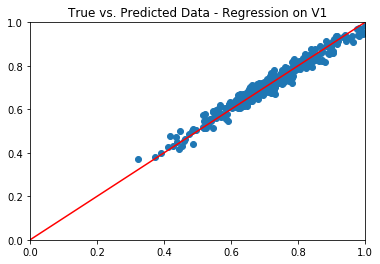

In [701]:
import matplotlib.lines as mlines
plt.title('True vs. Predicted Data - Regression on V1')
plt.scatter(y_testR1, y_predictedR1)
line = mlines.Line2D([0, 1], [0, 1], color='red')
plt.plot([0, 1], [0, 1],'r-')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig("V1-Regression-Comparison.png")
plt.show()


In [676]:
model_staticRegV2.score(x_testR2, y_testR2)

0.893894867474373

In [677]:
y_predictedR2 = model_staticRegV2.predict(x_testR2)

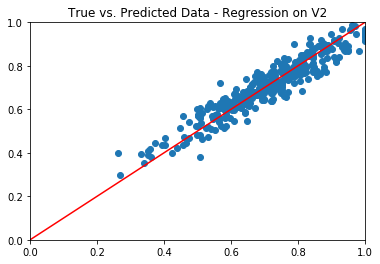

In [700]:
import matplotlib.lines as mlines
plt.title('True vs. Predicted Data - Regression on V2')
plt.scatter(y_testR2, y_predictedR2)
line = mlines.Line2D([0, 1], [0, 1], color='red')
plt.plot([0, 1], [0, 1],'r-')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig("V2-Regression-Comparison.png")
plt.show()




In [681]:
model_staticRegV3.score(x_testR3, y_testR3)

0.9999374877913465

In [682]:
y_predictedR3 = model_staticRegV3.predict(x_testR3)

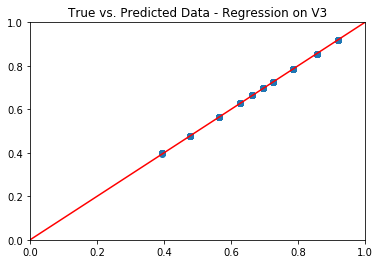

In [699]:
import matplotlib.lines as mlines
plt.title('True vs. Predicted Data - Regression on V3')
plt.scatter(y_testR3, y_predictedR3)
line = mlines.Line2D([0, 1], [0, 1], color='red')
plt.plot([0, 1], [0, 1],'r-')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig("V3-Regression-Comparison.png")
plt.show()





In [3]:
### START HERE!
import matplotlib.pyplot as plt

sim_staticV4 = pd.read_csv("../Data/Static_Data_ICU_var4_peak_v2.csv")
sim_staticV4 = sim_staticV4.drop(columns=["Unnamed: 0", "CHM"])
sim_staticV4 = sim_staticV4.replace(["M", "F"], [0,1])
sim_staticV4.columns

Index(['ICU', 'Age', 'Sex', 'Survival Probability', 'Score', 'Kidney', 'Blood',
       'Cholesterol', 'Immune', 'ApacheII', 'Urine Volume', 'Creatinine',
       'Urea', 'O2', 'HR', 'BP', 'RBC', 'LDL', 'HDL', 'Platelet', 'WBC', 'INR',
       'Death'],
      dtype='object')

In [4]:
x_trainR4, x_testR4, y_trainR4, y_testR4 = train_test_split(sim_staticV4.drop(["ICU","Death","Survival Probability"], axis = "columns"), sim_staticV4["Survival Probability"], test_size = 0.34)


In [5]:
model_staticRegV4 = RandomForestRegressor(n_estimators=100)
model_staticRegV4.fit(x_trainR4, y_trainR4)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [6]:
model_staticRegV4.score(x_testR4, y_testR4)

0.8077341386809596

In [7]:
y_predictedR4 = model_staticRegV4.predict(x_testR4)

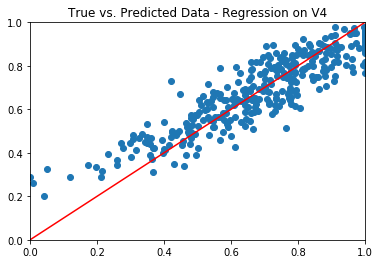

In [9]:
import matplotlib.lines as mlines
plt.title('True vs. Predicted Data - Regression on V4')
plt.scatter(y_testR4, y_predictedR4)
line = mlines.Line2D([0, 1], [0, 1], color='red')
plt.plot([0, 1], [0, 1],'r-')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig("V4-Regression-Comparison.png")
plt.show()